   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


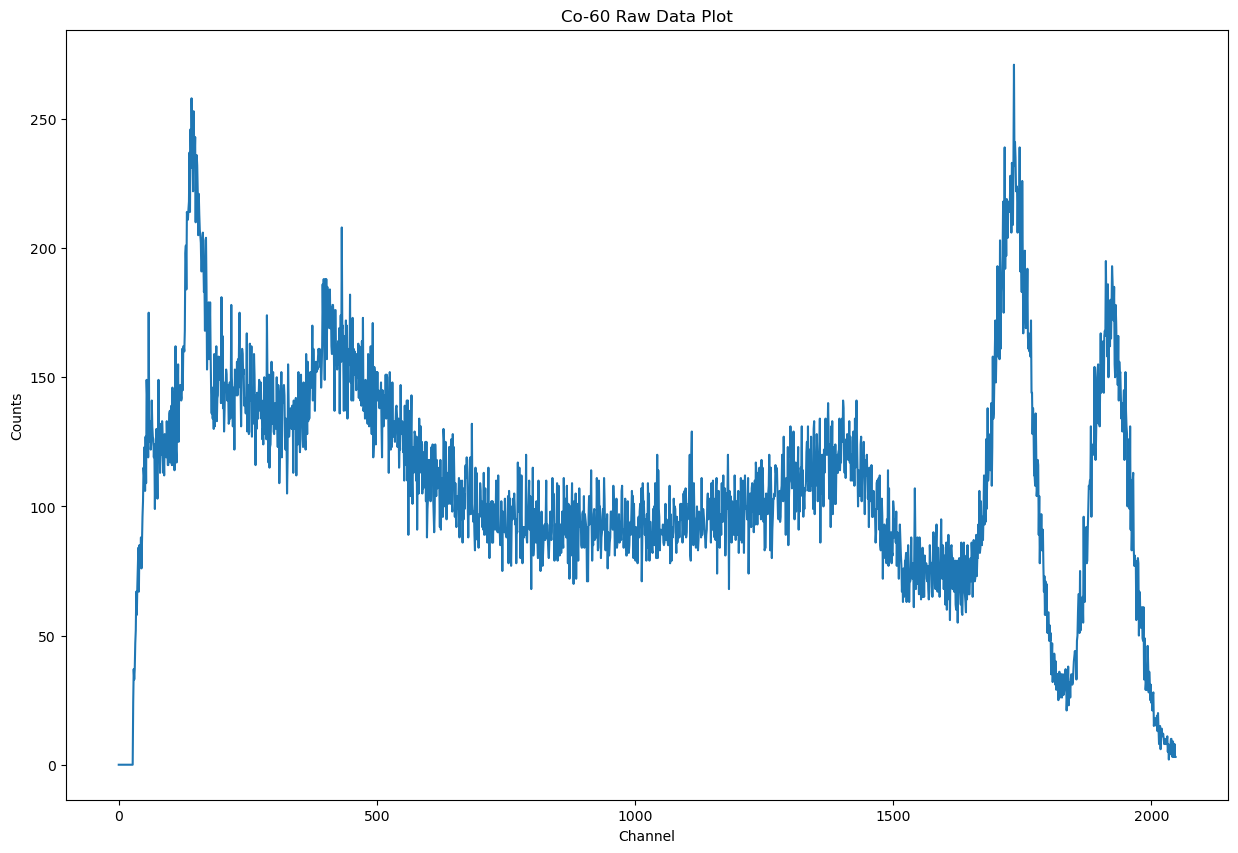

In [19]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Co_60 = pd.read_csv("Co_60.csv") # create pandas dataframe
print(df_Co_60.head()) # print first 5 rows


##############
# Plot data
##############

x_Co_60 = df_Co_60["Channel"] # grab column
y_Co_60 = df_Co_60["Counts"] # grab column
x_Co_60_sp = df_Co_60["Channel"][1800:] # grab column for second peak
y_Co_60_sp = df_Co_60["Counts"][1800:] # grab column for second peak
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Co-60 Raw Data Plot")
plt.plot(x_Co_60, y_Co_60)
plt.show()

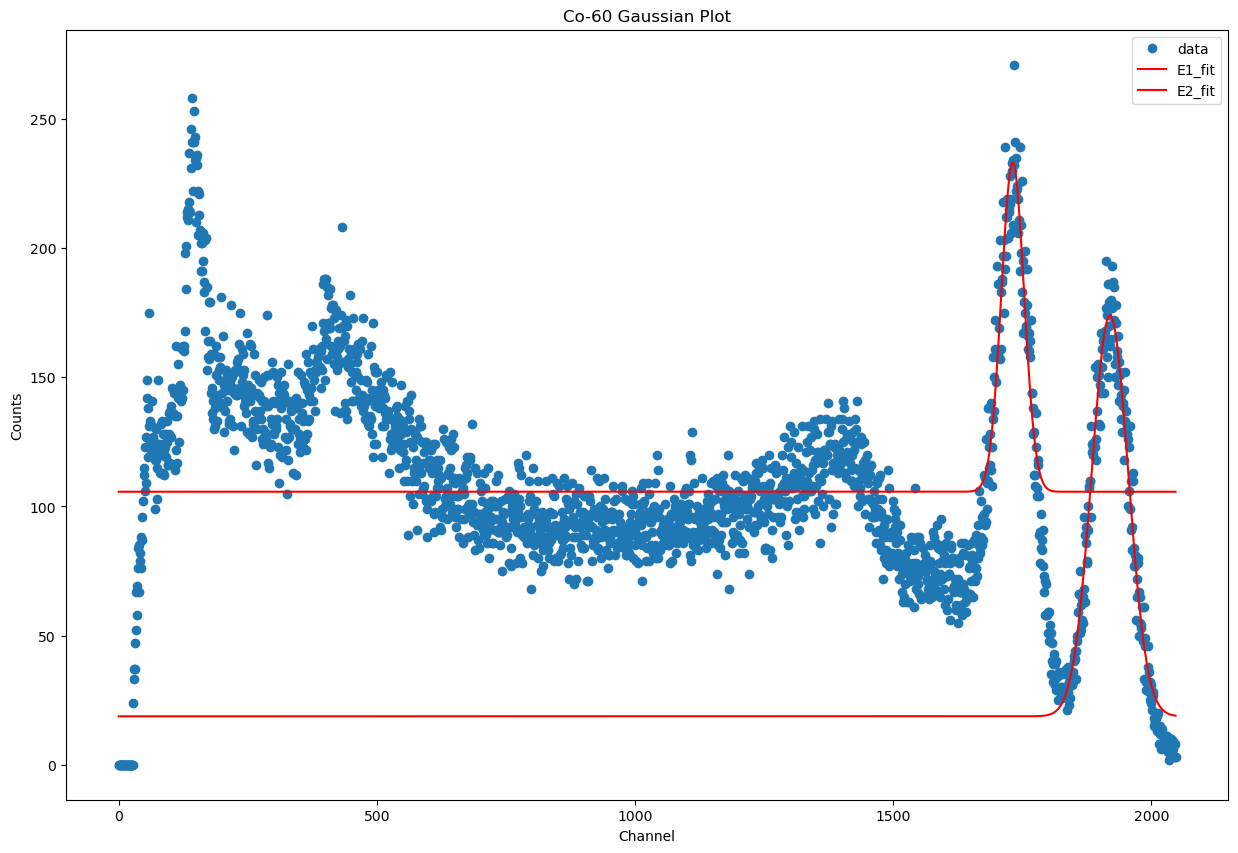

In [20]:
################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x, a, mean, sigma, h):
    fit = a*np.exp((-(x-mean)**2)/(2*sigma**2)) + h
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Co_60_e1, pcov_Co_60_e1 = curve_fit(gaus, x_Co_60, y_Co_60, p0=[a:=250, mean:=1700, sigma:=100, h:=50]) # solves for a, mean, sigma, h
y_Co_60_fit_e1 = gaus(x_Co_60, *popt_Co_60_e1) # creates y(x) = gaus function with fitted values

popt_Co_60_e2, pcov_Co_60_e2 = curve_fit(gaus, x_Co_60_sp, y_Co_60_sp, p0=[a:=150, mean:=1950, sigma:=100, h:=10]) # solves for a, mean, sigma, h
y_Co_60_fit_e2 = gaus(x_Co_60, *popt_Co_60_e2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Co_60, y_Co_60, 'o', label="data")
plt.plot(x_Co_60, y_Co_60_fit_e1, 'r-', label='E1_fit')
plt.plot(x_Co_60, y_Co_60_fit_e2, 'r-', label='E2_fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Co-60 Gaussian Plot")
plt.legend()
plt.show()

In [21]:
#####################
# Print fit data
# Print uncertainty
#####################

print("Fit Amplitude, Co-60-E1: ", popt_Co_60_e1[0],
      "\n Fit Mean, Co-60-E1: ", popt_Co_60_e1[1],
      "\n Fit Sigma, Co-60-E1: ", popt_Co_60_e1[2],
      "\n Fit Height, Co-60-E1: ", popt_Co_60_e1[3])

print("\n Uncertainty matrix, Co-60-E1: \n", pcov_Co_60_e1)

print("\n Fit Amplitude, Co-60-E2: ", popt_Co_60_e2[0],
      "\n Fit Mean, Co-60-E2: ", popt_Co_60_e2[1],
      "\n Fit Sigma, Co-60-E2: ", popt_Co_60_e2[2],
      "\n Fit Height, Co-60-E2: ", popt_Co_60_e2[3])

print("\n Uncertainty matrix, Co-60-E2: \n", pcov_Co_60_e2)

Fit Amplitude, Co-60-E1:  127.43378654309575 
 Fit Mean, Co-60-E1:  1731.6001283456444 
 Fit Sigma, Co-60-E1:  21.912185858593613 
 Fit Height, Co-60-E1:  105.68242643270565

 Uncertainty matrix, Co-60-E1: 
 [[ 5.85025944e+01  7.84487158e-06 -6.52978752e+00 -5.50980735e-01]
 [ 7.84487158e-06  2.29241806e+00 -1.34824958e-06 -3.89017505e-10]
 [-6.52978752e+00 -1.34824958e-06  2.33852472e+00 -1.89542823e-01]
 [-5.50980735e-01 -3.89017505e-10 -1.89542823e-01  7.79204433e-01]]

 Fit Amplitude, Co-60-E2:  155.21414926721698 
 Fit Mean, Co-60-E2:  1919.9092316093695 
 Fit Sigma, Co-60-E2:  35.5021406930267 
 Fit Height, Co-60-E2:  18.743688154714274

 Uncertainty matrix, Co-60-E2: 
 [[ 4.66866155e+00  7.00768943e-04  1.55949902e-02 -1.69871674e+00]
 [ 7.00768943e-04  2.40838343e-01  2.89540901e-04 -9.44989790e-04]
 [ 1.55949902e-02  2.89540901e-04  4.82670674e-01 -7.57467402e-01]
 [-1.69871674e+00 -9.44989790e-04 -7.57467402e-01  2.37318461e+00]]
